In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
#load data and set index
universe = pd.read_csv('universe.csv')
df = pd.DataFrame(universe)
df.set_index('ticker', inplace=True)
#fix some columns
df.roa = df.roa.str.replace('%','').astype('float')
df.roe = df.roe.str.replace('%','').astype('float')
df.short_to_float = df.short_to_float.str.replace('%','').astype('float')
df.oper_margin = df.oper_margin.str.replace('%','').astype('float')
df.profit_margin = df.profit_margin.str.replace('%','').astype('float')
df.loc['TSLA','trail_pe'] = 1640
df.trail_pe = df.trail_pe.astype('float')
df.loc['NLOK','px2book'] = 1190
df.px2book = df.px2book.astype('float')
df['ticker2'] = df.index
df['analyst_est'] = ((df['1y_est'] / df['px'])-1)*100
df.perf_1y = df.perf_1y.str.replace('%','').astype('float')

In [75]:
df.sector.value_counts()

Industrials               73
Technology                71
Financial Services        68
Consumer Cyclical         64
Healthcare                63
Consumer Defensive        34
Utilities                 28
Real Estate               27
Communication Services    26
Energy                    24
Basic Materials           21
Name: sector, dtype: int64

In [135]:
sector_grp = df.groupby(['sector'])

In [147]:
sector_grp.get_group('Technology')

,name,div_yld,eps,pe,1y_est,52wk_low,52wk_high,avg_vol,beta,mktcap,...,social_risk,dt_add,founded,hq,name_y,sector_y,sub_industry,perf_1y,ticker2,analyst_est
ticker,,,,,,,,,,,,,,,,,,,,,
ACN,Accenture plc,1.37,8.12,31.88,281.36,137.15,271.18,1895051,1.12,171.584,...,5.0,7/6/2011,1989,"Dublin, Ireland",Accenture plc,Information Technology,IT Consulting & Other Services,20.45,ACN,8.645789
ADBE,Adobe Inc.,NaN,10.83,45.86,563.44,255.13,536.88,2575945,0.97,237.732,...,5.7,5/5/1997,1982,"San Jose, California",Adobe Inc.,Information Technology,Application Software,31.67,ADBE,13.454955
AMD,"Advanced Micro Devices, Inc.",NaN,2.06,44.89,102.37,36.75,99.23,42946298,2.20,112.241,...,NaN,3/20/2017,1969,"Santa Clara, California",Advanced Micro Devices,Information Technology,Semiconductors,64.83,AMD,10.479171
AKAM,"Akamai Technologies, Inc.",NaN,3.37,30.11,126.00,75.18,124.91,1833303,0.41,16.538,...,11.8,7/12/2007,1998,"Cambridge, Massachusetts",Akamai Technologies,Information Technology,Internet Services & Infrastructure,0.62,AKAM,24.186872
APH,Amphenol Corporation,NaN,3.91,33.91,141.86,63.05,137.18,1267588,1.28,39.721,...,6.0,9/30/2008,1932,"Wallingford, Connecticut",Amphenol Corp,Information Technology,Electronic Components,34.04,APH,6.991477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNT,Vontier Corporation,NaN,NaN,NaN,40.13,26.36,39.00,2700748,NaN,5.717,...,NaN,10/9/2020,2019,"Raleigh, North Carolina",Vontier,Information Technology,Electronic Equipment & Instruments,20.62,VNT,18.272915
WDC,Western Digital Corporation,NaN,0.55,115.44,63.92,27.40,71.30,4769451,1.62,19.576,...,5.0,7/1/2009,1970,"San Jose, California",Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals",-4.01,WDC,-0.062539
XRX,Xerox Holdings Corporation,4.24,0.85,27.68,17.80,14.22,38.69,2340851,1.89,4.678,...,NaN,NaN,2017 (1906),"Norwalk, Connecticut",Xerox,Information Technology,"Technology Hardware, Storage & Peripherals",-36.30,XRX,-24.512299


In [ ]:
sector_grp['industry'].value_counts().loc['Basic Materials']

In [87]:
sector_grp['beta','pe'].agg(['median','mean','count'])

<ipython-input-87-4e4b7448d90a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sector_grp['beta','pe'].agg(['median','mean','count'])


beta                       pe                  
                       median      mean count   median        mean count
sector                                                                  
Basic Materials         1.160  1.172222    18   31.000   33.467059    17
Communication Services  1.010  1.104783    23   26.020   30.484444    18
Consumer Cyclical       1.335  1.394844    64   27.100   76.859767    43
Consumer Defensive      0.620  0.685152    33   22.540   25.177419    31
Energy                  2.140  2.173333    24  124.760  125.108000     5
Financial Services      1.190  1.210303    66   18.535   22.800781    64
Healthcare              0.845  0.892097    62   32.395   53.465185    54
Industrials             1.150  1.212535    71   29.625   33.476724    58
Real Estate             0.810  0.935385    26   35.435   55.819167    24
Technology              1.160  1.180448    67   36.680   77.540299    67
Utilities               0.340  0.426786    28   20.125   22.851250    24

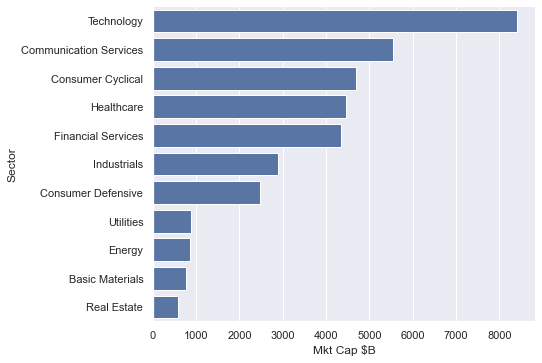

In [177]:
graph = sector_grp['mktcap'].agg(['sum']).sort_values(by='sum',ascending=False)
graph.reset_index(inplace=True)
graph
g = sns.catplot(y="sector",x='sum' ,data=graph, aspect=1.5, kind="bar", color="b")
g.set(xlabel="Mkt Cap $B", ylabel = "Sector")

# ax = sns.barplot( data=graph)
# g = sns.catplot(y="sector", x='sum', data=graph, aspect=1.5, kind="bar", color="b")

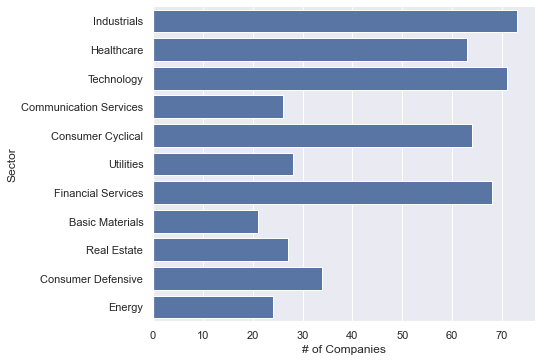

In [178]:
g = sns.catplot(y="sector", data=df, aspect=1.5, kind="count", color="b")
g.set(xlabel="# of Companies", ylabel = "Sector")
# g.set_xticklabels(rotation=90)

(0.0, 100.0)

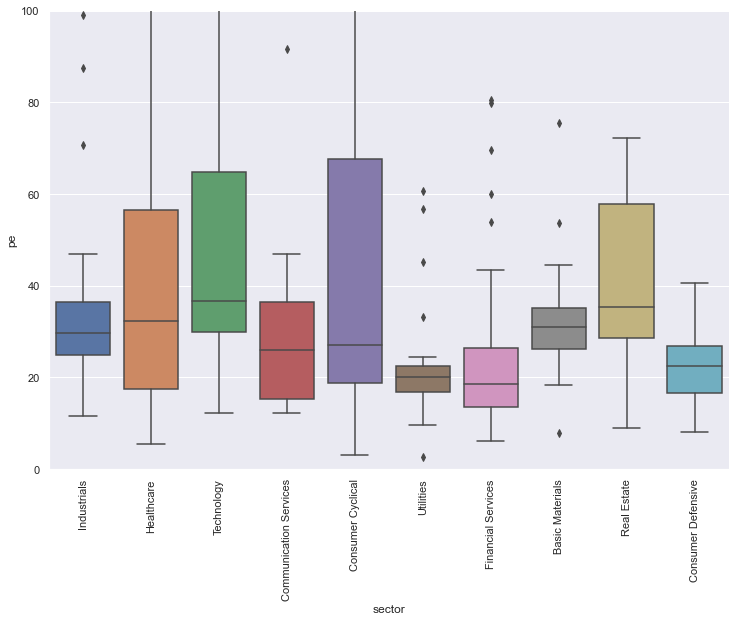

In [139]:
#gtg
filt = df.sector != 'Energy'
df2=df.loc[filt]
g = sns.catplot(x="sector", y="pe", kind="box", data=df2, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
plt.ylim(0,100)

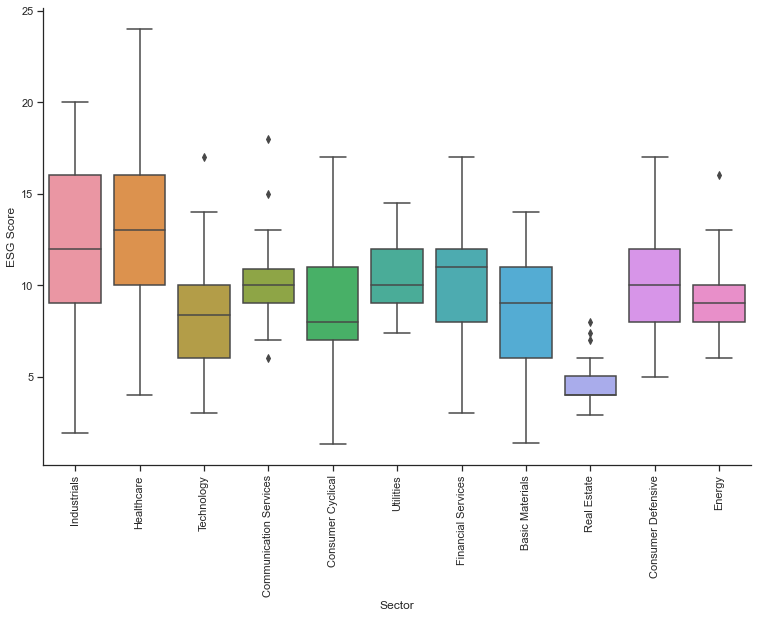

In [225]:
#gtg
g = sns.catplot(x="sector", y="social_risk", kind="box", data=df, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlabel="Sector", ylabel = "ESG Score")
# plt.ylim(-50,100)

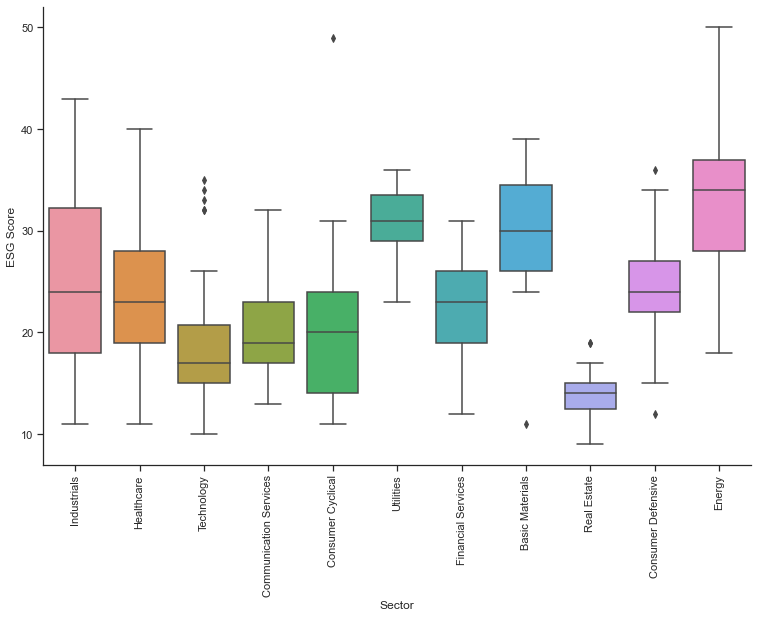

In [209]:
#gtg
g = sns.catplot(x="sector", y="esg_score", kind="box", data=df, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlabel="Sector", ylabel = "ESG Score")
# plt.ylim(-50,100)

(-50.0, 100.0)

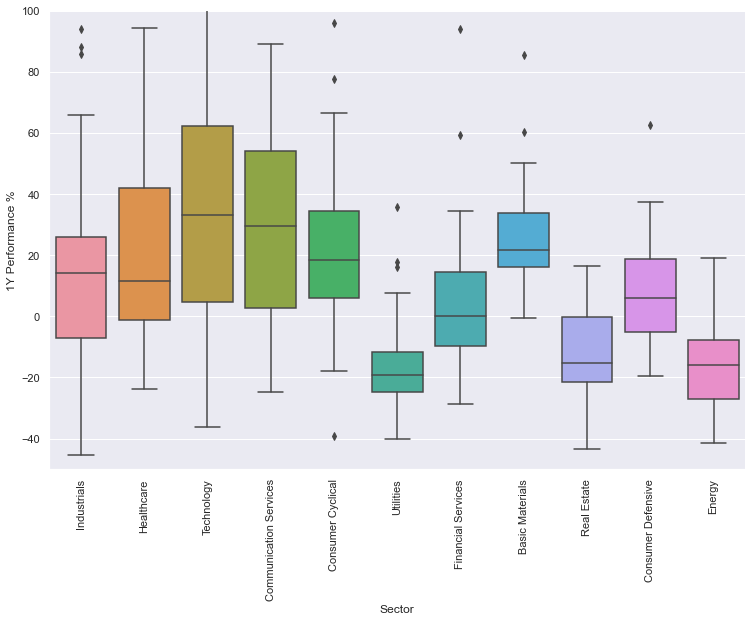

In [189]:
#gtg
g = sns.catplot(x="sector", y="perf_1y", kind="box", data=df, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlabel="Sector", ylabel = "1Y Performance %")
plt.ylim(-50,100)

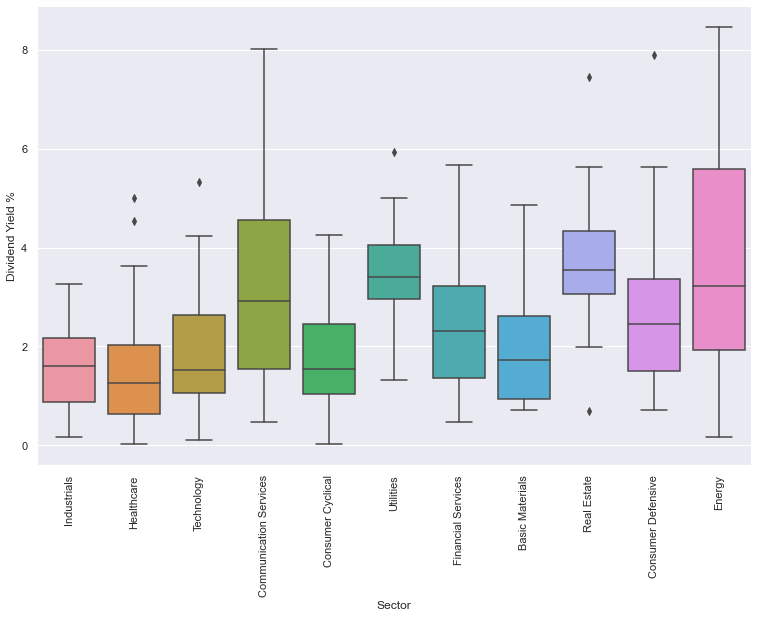

In [179]:
#gtg
g = sns.catplot(x="sector", y="div_yld", kind="box", data=df, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlabel="Sector", ylabel = "Dividend Yield %")
# plt.ylim(-20,40)

(-20.0, 40.0)

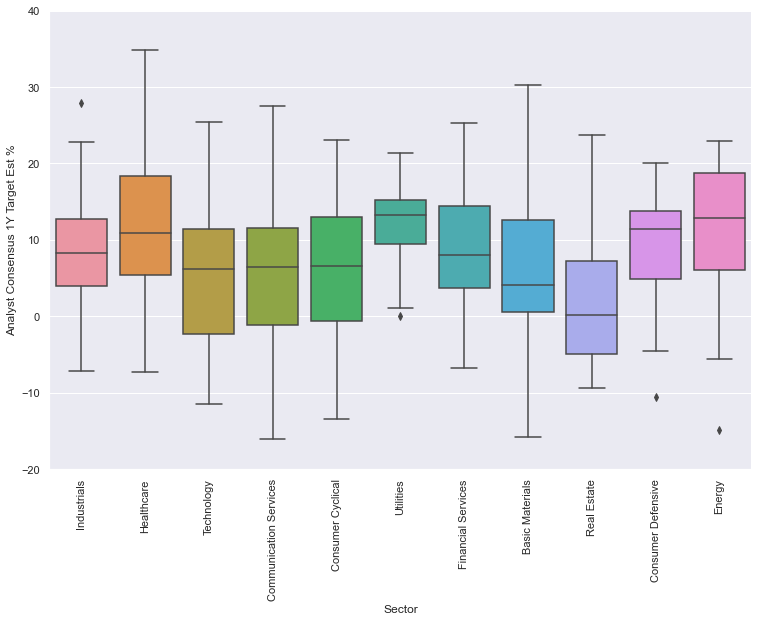

In [183]:
#gtg
g = sns.catplot(x="sector", y="analyst_est", kind="box", data=df, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlabel="Sector", ylabel = "Analyst Consensus 1Y Target Est %")
plt.ylim(-20,40)

(-1.0, 3.5)

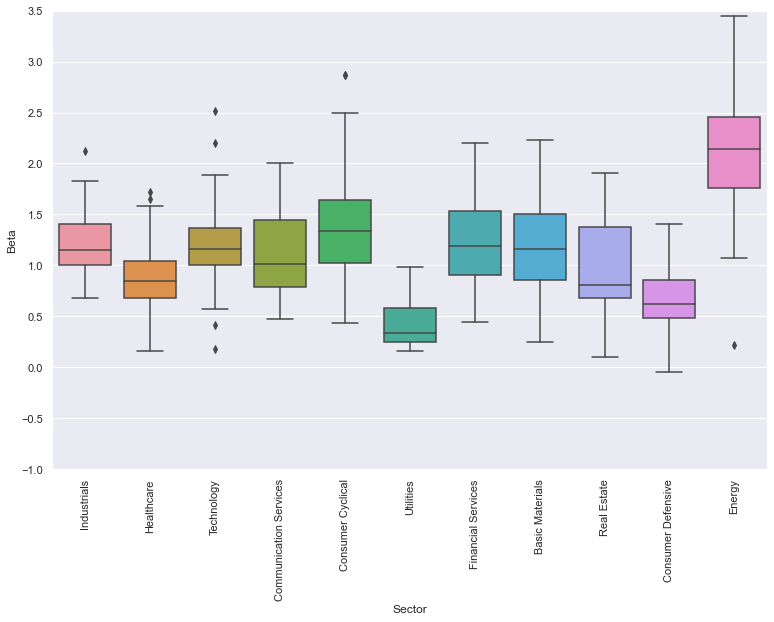

In [200]:
#gtg.  beta by sector
g = sns.catplot(x="sector", y="beta", kind="box", data=df, height=7, aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(xlabel="Sector", ylabel = "Beta")
plt.ylim(-1,3.5)

In [ ]:
# sns.set(font_scale=1.5,style="white")
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="analyst_est",y="sector",data=df,palette=["m", "g"])
plt.xlim(-20,40)
# sns.set_xticklabels(rotation = 90) 
# plt.ylim(-18,45)
sns.despine(offset=10, trim=True)
plt.show()

(-20.0, 40.0)

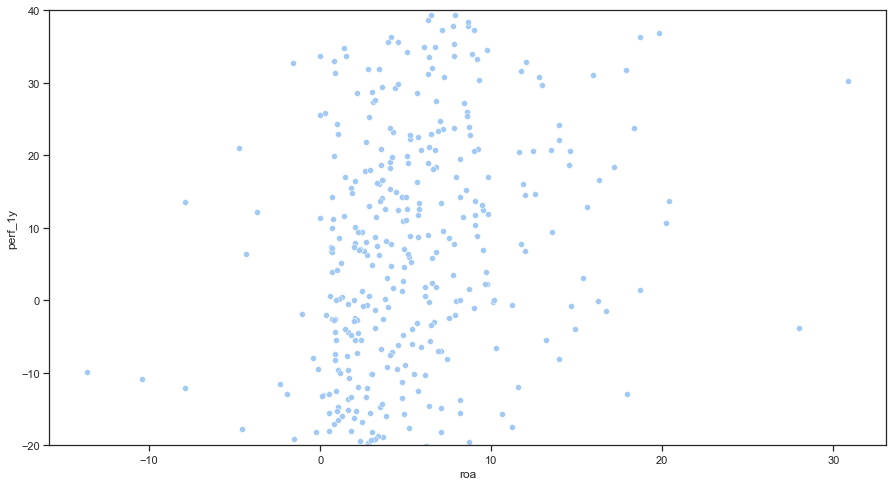

In [206]:
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x="roa", y="perf_1y")
plt.ylim(-20,40)

In [ ]:
plt.figure(figsize=(5,5))
df.plot.scatter(x='roe', y='perf_1y',xlim=(-1,30),ylim=(-75,150))
# plt.ylim(-20,100)


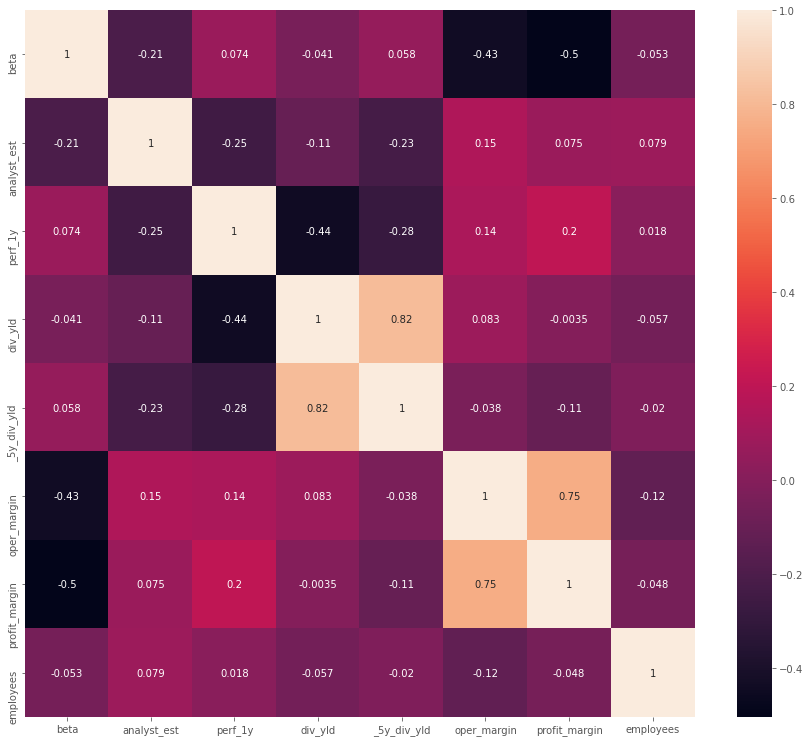

In [38]:
cor = df[['beta','analyst_est','perf_1y','div_yld','_5y_div_yld','oper_margin','profit_margin','employees']]
corrMatrix = cor.corr()
corrMatrix

fig_dims = (15,13)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix, annot=True)
plt.show()

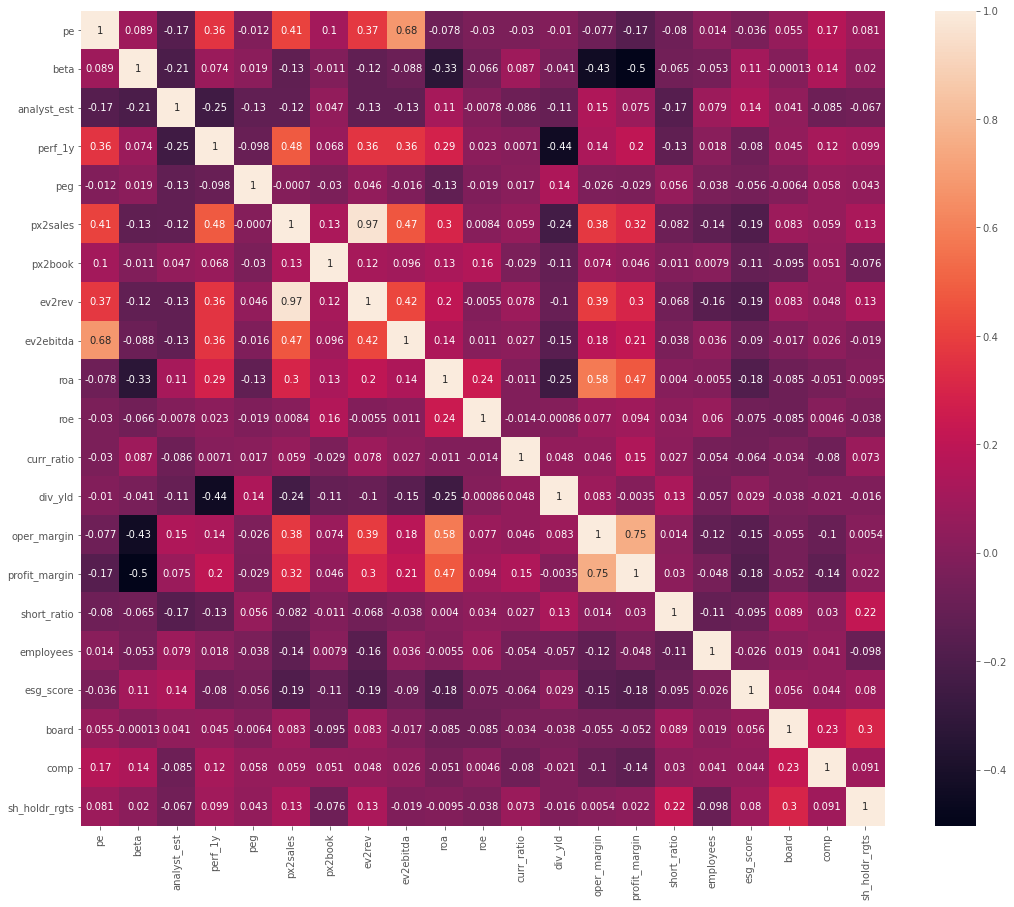

In [37]:
cor = df[['pe','beta','analyst_est','perf_1y','peg','px2sales','px2book','ev2rev','ev2ebitda','roa','roe',\
          'curr_ratio','debt_to_eq','div_yld','oper_margin','profit_margin','short_ratio','employees',\
          'esg_score','board','comp','sh_holdr_rgts']]
corrMatrix = cor.corr()
corrMatrix

fig_dims = (18,15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corrMatrix, annot=True)
plt.show()

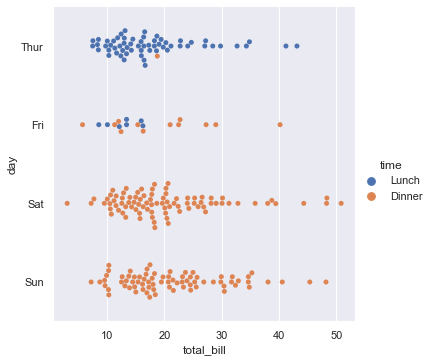

In [148]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

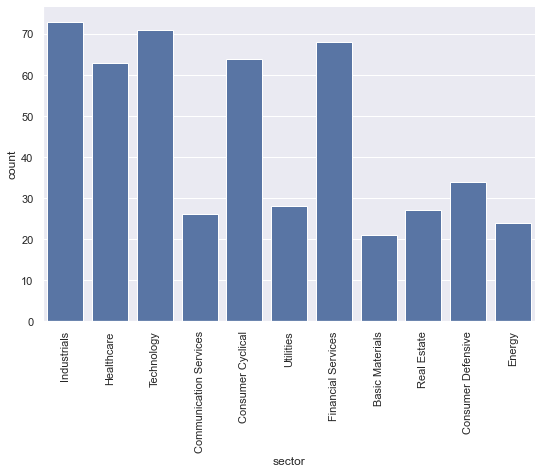

In [152]:
g = sns.catplot(x="sector", data=df, aspect=1.5, kind="count", color="b")
g.set_xticklabels(rotation=90)

In [ ]:


corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<AxesSubplot:xlabel='score', ylabel='sector'>

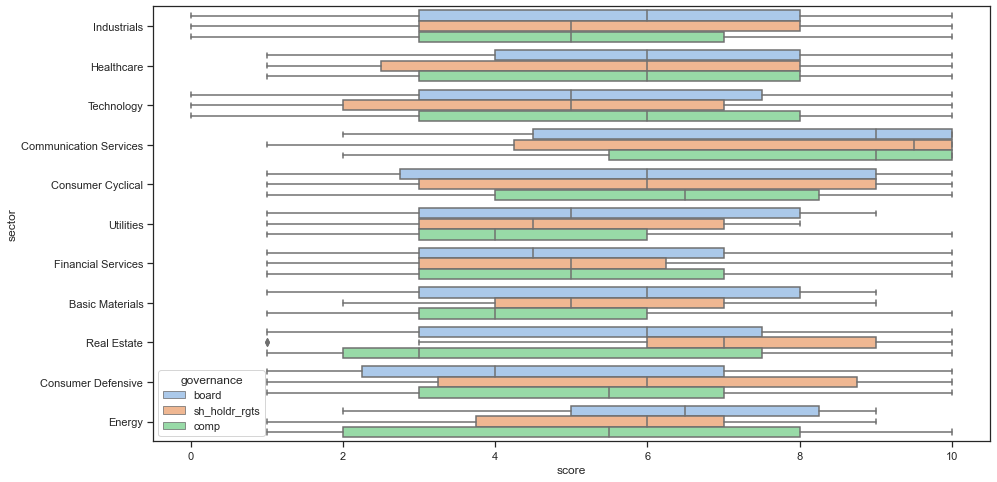

In [219]:
governance = df[['sector','board','sh_holdr_rgts','comp']]
governance = pd.melt(governance, id_vars=['sector'], value_vars=['board','sh_holdr_rgts','comp'],\
       var_name='governance',value_name='score')
governance

fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="score", y="sector",
            hue="governance",
            data=governance)